# MDMA Substance Analysis and Chi-Squared Test for Geographic Distribution

# Methodology

Utilizing data courtesy of the UNC Street Drug Analysis, we examined samples of MDMA from Washington, Oregon, North Carolina, and New York. The primary goal of this study was to investigate the prevalence of different substance combinations found in MDMA samples and how these combinations vary across geographic locations. Secondarily, we analyzed whether the distribution of substance combinations in MDMA samples is independent of the state where the samples were collected.

The dataset used for this study was obtained from laboratory tests of drug samples, and we filtered the data to include only samples expected to contain MDMA. The dataset includes various binary indicators for substances found in each sample, along with geographic identifiers such as the state in which the sample was collected.

### 1. Data Collection
The dataset was acquired from laboratory tests, specifically focusing on samples labeled as expected to contain MDMA. It included binary indicators for various substances detected in each sample and geographic identifiers indicating the state where the sample was collected.

### 2. Data Preprocessing
- **MDMA Sample Filtering**: The dataset was first filtered to include only those samples expected to contain MDMA. This ensured that the analysis was limited to MDMA-related samples.
  
- **Confounder Removal**: To reduce potential bias, samples that were collected via swabs, those reported as having a "weird sensation," and those marked as consumed were excluded from the analysis.

### 3. Descriptive Analysis
- **Average Number of Substances**: The average number of substances detected in the MDMA samples was calculated. This was done by summing the presence of all substances across the samples and dividing by the total number of samples.

- **MDMA Presence**: The percentage of samples that contained MDMA, as indicated by laboratory results, was calculated from the total number of MDMA-expected samples.

### 4. Substance Combinations
- **Combination Identification**: Binary indicators for various substances (e.g., fentanyl, methamphetamine, cocaine) were used to create a new column representing the combinations of substances detected. The combinations were converted into human-readable formats to identify co-occurring substances in each sample.

- **Prevalence of Combinations**: The frequency of each unique substance combination was calculated to identify the most common combinations found in MDMA samples. This was visualized using bar plots and pie charts.

### 5. Geographic Distribution and Statistical Testing
- **Geographic Variation**: The variation in substance combinations across states was explored by calculating the number of samples from each state and analyzing the prevalence of substance combinations within each state. This provided insights into whether certain substance combinations were more prevalent in specific geographic regions.

- **Chi-Squared Test**: A chi-squared test for independence was conducted to determine whether the distribution of substance combinations was independent of the state in which the samples were collected. The test compared observed frequencies of substance combinations across states with the expected frequencies under the assumption of independence.

  - **Null Hypothesis (H₀)**: The distribution of substance combinations is independent of the state.
  - **Alternative Hypothesis (H₁)**: The distribution of substance combinations depends on the state.


# Data Analysis

## 1. Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 2. Load Dataset

In [92]:
df = pd.read_csv('samples.csv')
df.head()

,sampleid,state,sampletype,consumed,expectedsubstance,sen_weird,primary,trace,lab_null,lab_num_substances_any,...,lab_nitazene_any,lab_meth_impurities_any,lab_mdma_impurities_any,lab_cocaine_impurities_any,lab_common_cuts_any,lab_heroin_impurities_any,lab_cannabinoids_any,lab_fentanyl_impurities_any,lab_pf_fent_impurities_any,lab_substituted_cathinones_any
0,803909,OR,spatula,0,fentanyl,0.0,1,0,NaN,2,...,0,0,0,0,0,0,0,1,0,0
1,600644,OR,unknown,1,M30,1.0,1,1,NaN,5,...,0,0,0,0,0,0,0,0,1,0
2,600700,OR,swab,1,fentanyl,0.0,1,1,NaN,6,...,0,0,0,0,1,0,0,1,0,0
3,500428,OR,pill,0,fentanyl,0.0,1,1,NaN,5,...,0,0,0,0,0,0,0,1,0,0
4,600607,OR,spatula,1,ketamine,1.0,1,1,NaN,3,...,0,0,0,0,0,0,0,0,0,0


## 3. Create a Data Frame for MDMA Samples

Filter the data to include only the samples expected to contain MDMA

In [94]:
mdma_df = df[df['expectedsubstance'] == 'MDMA']

mdma_df.shape

(188, 50)

## 4. Remove Cofounders

Remove samples collected by swabs, had a weird sensation reported, and ones that were consumed

In [96]:
# Columns of "swab" samples
filtered_df = mdma_df[mdma_df['sampletype'] !='swab']

filtered_df.shape

(166, 50)

In [98]:
# Rows of "weird" "sensation" samples
filtered_df2 = filtered_df[filtered_df['sen_weird'] != 1]

filtered_df2.shape

(159, 50)

In [100]:
df_cleaned = filtered_df2[filtered_df2['consumed'] != 1]

df_cleaned.shape

(134, 50)

## 5. Average Number of Substances in Samples
Calculate and display the average number of substances in the cleaned MDMA samples.

In [102]:
average_any = df_cleaned['lab_num_substances_any'].mean()

print(average_any)

1.4104477611940298


## 6. What Percent of Expected MDMA samples contain MDMA?

In [104]:
Total = df_cleaned['lab_mdma'].sum()
print(Total)

95


39 of 134 (29.1%) of samples did not test positive for MDMA

# Finding Combinations
Combine the substances into readable combinations and calculate their prevalence.

### Step 1: Define the substances list

In [106]:
substances = [
    'lab_fentanyl_any',
    'lab_xylazine_any',
    'lab_meth_any',
    'lab_cocaine_any',
    'lab_caffeine',
    'lab_gabapentin',
    'lab_levamisole_any',
    'lab_mdma',
    'lab_tramadol',
    'lab_carfentanil_any',
    'lab_ketamine_any',
    'lab_btmps_any',
    'lab_opioid_any',
    'lab_synthetic_cannabinoid_any',
    'lab_potent_benzodiazepine_any',
    'lab_benzodiazepine_any',
    'lab_nitazene_any'
]

#### Step 2: Use .loc[] to avoid the SettingWithCopyWarning and create the combination column using only the specified substances

In [110]:
df_cleaned.loc[:, 'substance_combination'] = df_cleaned.loc[:, substances].astype(str).agg('-'.join, axis=1)

#### Step 3: Define a function to convert binary combination to human-readable substance names using the provided substance_mapping

In [112]:
substance_mapping = {
    0: 'Fentanyl',
    1: 'Xylazine',
    2: 'Meth',
    3: 'Cocaine',
    4: 'Caffeine',
    5: 'Gabapentin',
    6: 'Levamisole',
    7: 'MDMA',
    8: 'Tramadol',
    9: 'Carfentanyl',
    10: 'Ketamine',
    11: 'BTMPS',
    12: 'Opioid',
    13: 'Synthetic Cannabinoid',
    14: 'Potent Benzodiazepine',
    15: 'Benzodiazepine',
    16: 'Nitazene'
}

def human_readable_combination(combination_str):
    binary_list = combination_str.split('-')  # Split the binary string
    substances_present = []
    for i, value in enumerate(binary_list):
        if value == '1':
            # Map the index to the human-readable substance name
            if i in substance_mapping:
                substances_present.append(substance_mapping[i])
            else:
                substances_present.append(f"Unknown substance (index {i})")  # Fallback for unknown index
    if substances_present:
        return ', '.join(substances_present)  # Join the substance names as a readable string
    else:
        return 'No substances detected'


### Step 4: Apply the function to the new column in the DataFrame to create a human-readable column

In [116]:
df_cleaned.loc[:, 'human_readable_combination'] = df_cleaned['substance_combination'].map(human_readable_combination)

In [118]:
#Print Readable Head
print(df_cleaned[['state', 'human_readable_combination']].head())

    state human_readable_combination
56     OR                       MDMA
59     OR     Fentanyl, Meth, Opioid
256    OR     No substances detected
288    OR                 Meth, MDMA
289    OR             MDMA, Ketamine


### Step 6: Create a contingency table using df_cleaned and the specified substances

In [120]:
# Count occurrences of each substance combination per state
contingency_table = pd.crosstab(df_cleaned['state'], df_cleaned['substance_combination'])

### Step 7: Apply the function to the index of the contingency table to get human-readable combinations

In [122]:
contingency_table_readable = contingency_table.copy()  # Make a copy of the original table
contingency_table_readable.columns = contingency_table.columns.map(human_readable_combination)  # Map human-readable names to the columns

In [124]:
print(contingency_table_readable)

substance_combination  No substances detected  Ketamine  MDMA  MDMA, Ketamine  \
state                                                                           
NC                                          2         0    11               0   
NY                                          9         0     5               0   
OR                                          2         0     1               1   
WA                                          6         1    65               4   

substance_combination  Caffeine  Cocaine, MDMA  Cocaine, MDMA, Ketamine  Meth  \
state                                                                           
NC                            0              1                        1     0   
NY                            0              0                        0     7   
OR                            0              0                        0     0   
WA                            1              0                        1     0   

substance_combination  Met

## Data Visualization

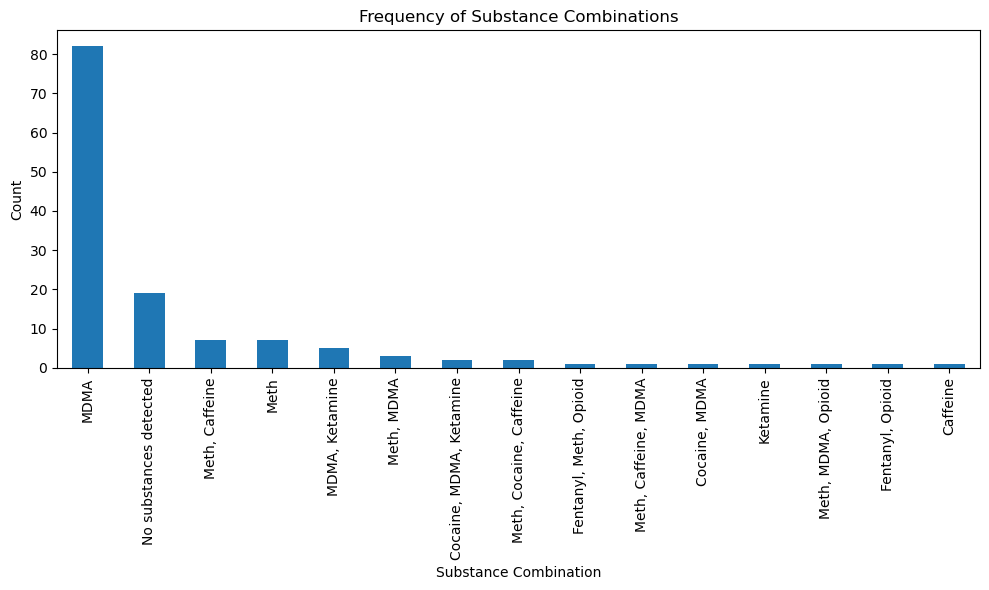

In [126]:
# Count the occurrences of each human-readable combination
combination_counts = df_cleaned['human_readable_combination'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
combination_counts.plot(kind='bar')
plt.title('Frequency of Substance Combinations')
plt.xlabel('Substance Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

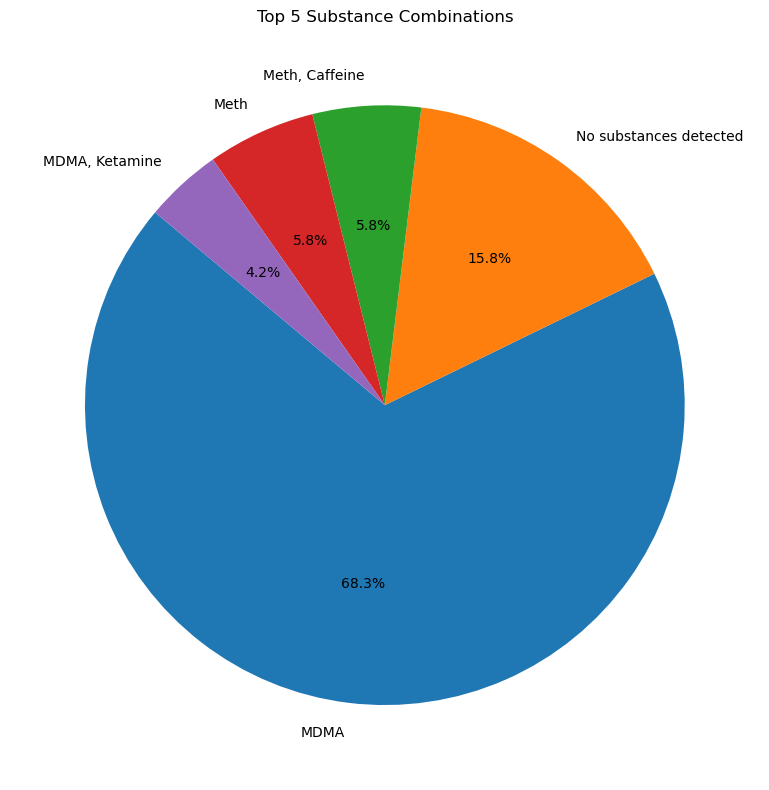

In [128]:
# Plot the top 5 substance combinations as a pie chart
top_5_combinations = combination_counts.head(5)
plt.figure(figsize=(8, 8))
top_5_combinations.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Substance Combinations')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.tight_layout()
plt.show()

In [130]:
# Export df_cleaned to a CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)  # 'index=False' to exclude row numbers from the CSV

In [132]:
# Export contingency_table_readable to a CSV file
contingency_table_readable.to_csv('contingency_table_readable.csv')

In [134]:
# Step 1: Group by the human-readable substance combination and count occurrences
combination_counts = df_cleaned['human_readable_combination'].value_counts().reset_index()
combination_counts.columns = ['human_readable_combination', 'count']

# Step 2: Calculate the total number of samples tested
total_samples = len(df_cleaned)

# Step 3: Calculate the prevalence (percentage) for each combination
combination_counts['prevalence'] = (combination_counts['count'] / total_samples) * 100

# Step 4: Sort by prevalence (optional)
combination_counts = combination_counts.sort_values(by='prevalence', ascending=False)

# Step 5: Display the table
print(combination_counts)

   human_readable_combination  count  prevalence
0                        MDMA     82   61.194030
1      No substances detected     19   14.179104
2              Meth, Caffeine      7    5.223881
3                        Meth      7    5.223881
4              MDMA, Ketamine      5    3.731343
5                  Meth, MDMA      3    2.238806
6     Cocaine, MDMA, Ketamine      2    1.492537
7     Meth, Cocaine, Caffeine      2    1.492537
8      Fentanyl, Meth, Opioid      1    0.746269
9        Meth, Caffeine, MDMA      1    0.746269
10              Cocaine, MDMA      1    0.746269
11                   Ketamine      1    0.746269
12         Meth, MDMA, Opioid      1    0.746269
13           Fentanyl, Opioid      1    0.746269
14                   Caffeine      1    0.746269


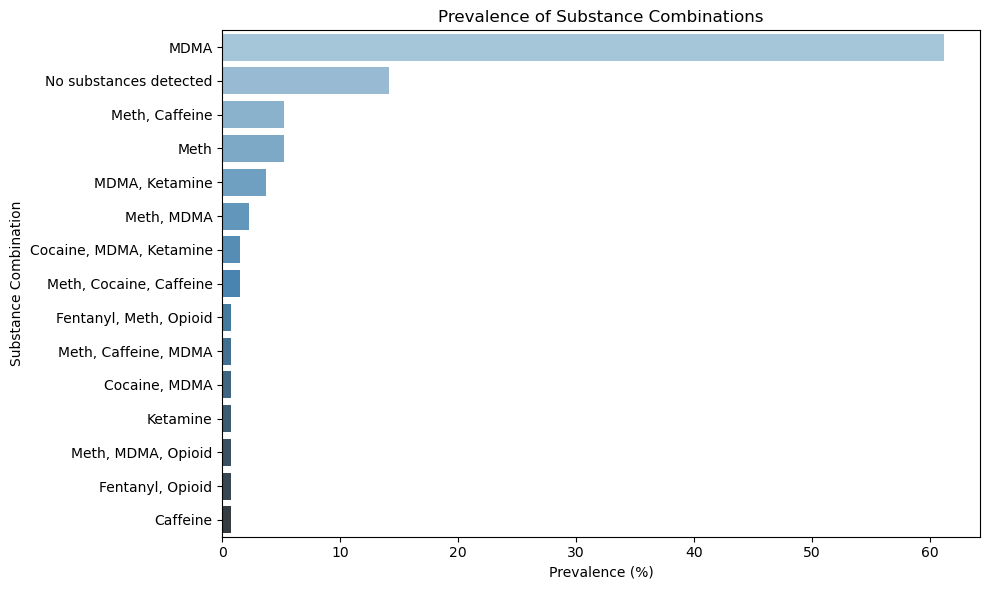

In [136]:
# Bar plot for substance combination prevalence
plt.figure(figsize=(10, 6))
sns.barplot(x='prevalence', y='human_readable_combination', data=combination_counts, palette="Blues_d")
plt.title('Prevalence of Substance Combinations')
plt.xlabel('Prevalence (%)')
plt.ylabel('Substance Combination')
plt.tight_layout()
plt.show()

# Is the distribution of substance combinations independent of the state in which they are found?

**Hypotheses:**
* Null Hypothesis (H₀): The distribution of substance combinations is independent of the state (i.e., the geographic location has no effect on the prevalence of specific combinations).
* Alternative Hypothesis (H₁): The distribution of substance combinations depends on the state (i.e., there is a relationship between geographic location and the prevalence of specific combinations).

In [138]:
import scipy.stats as stats

# Perform chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpretation based on p-value
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of substance combinations depends on the state.")
else:
    print("Fail to reject the null hypothesis: The distribution of substance combinations is independent of the state.")


Chi-squared statistic: 120.93987269518595
P-value: 1.4203149428633505e-09
Degrees of freedom: 42
Expected frequencies:
[[3.11940299e+00 1.64179104e-01 1.34626866e+01 8.20895522e-01
  1.64179104e-01 1.64179104e-01 3.28358209e-01 1.14925373e+00
  4.92537313e-01 1.64179104e-01 1.14925373e+00 1.64179104e-01
  3.28358209e-01 1.64179104e-01 1.64179104e-01]
 [3.40298507e+00 1.79104478e-01 1.46865672e+01 8.95522388e-01
  1.79104478e-01 1.79104478e-01 3.58208955e-01 1.25373134e+00
  5.37313433e-01 1.79104478e-01 1.25373134e+00 1.79104478e-01
  3.58208955e-01 1.79104478e-01 1.79104478e-01]
 [8.50746269e-01 4.47761194e-02 3.67164179e+00 2.23880597e-01
  4.47761194e-02 4.47761194e-02 8.95522388e-02 3.13432836e-01
  1.34328358e-01 4.47761194e-02 3.13432836e-01 4.47761194e-02
  8.95522388e-02 4.47761194e-02 4.47761194e-02]
 [1.16268657e+01 6.11940299e-01 5.01791045e+01 3.05970149e+00
  6.11940299e-01 6.11940299e-01 1.22388060e+00 4.28358209e+00
  1.83582090e+00 6.11940299e-01 4.28358209e+00 6.119402

This suggests that the distribution of substance combinations is dependent on the state. In other words, the types of substance combinations found in samples are not evenly distributed across states; some combinations are more likely to occur in certain states than others.

In [140]:
# Count the number of rows for each state
state_counts = df_cleaned['state'].value_counts()

# Display the result
print(state_counts)

state
WA    82
NY    24
NC    22
OR     6
Name: count, dtype: int64


# Results

### 1. Descriptive Statistics
- Before removing confounders, a total of 188 samples were analyzed from four states: 
  - Washington (108)
  - North Carolina (41)
  - New York (31)
  - Oregon (8).
  
- After removing confounders, 134 samples remained: 
  - Washington (82)
  - North Carolina (24)
  - New York (22)
  - Oregon (6).
  
- The average number of substances found in the MDMA samples was **1.41**.

### 2. Prevalence of Substance Combinations
- The most prevalent substance combination found was **MDMA** alone, present in 82 samples (61.19% of the total).
- **No substances detected** was the second most frequent category, occurring in 19 samples (14.18%).
- Other notable combinations included:
  - **Meth, Caffeine**: 7 samples (5.22%)
  - **Meth** alone: 7 samples (5.22%)
  - **MDMA, Ketamine**: 5 samples (3.73%)
  - **Meth, MDMA**: 3 samples (2.24%)
  
- Less common combinations, each appearing in 1-2 samples, included mixtures of **Cocaine**, **Fentanyl**, **Opioid**, and **Ketamine** with other substances.

### 3. Chi-Squared Test Results
- A chi-squared test for independence was conducted to assess whether the distribution of substance combinations was independent of the state where the sample was collected.
- The chi-squared statistic was **120.94** with a p-value of **1.42e-09** and **42 degrees of freedom**.
- Based on the extremely low p-value, the null hypothesis was rejected, indicating that the **distribution of substance combinations depends on the state**. This suggests that certain substance combinations are more prevalent in some states than others.

### 4. Conclusion
- The analysis revealed significant geographic variations in the prevalence of substance combinations found in MDMA samples. States exhibited different profiles of substance combinations, highlighting regional differences in drug markets or usage patterns. Further research could explore the factors contributing to these differences and how they relate to local drug supply chains or consumer preferences.
